<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/GrouchoGrammar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import nltk
from nltk.grammar import *

 See this NLTK webpage [**8. Analyzing Sentence Structure**](https://www.nltk.org/book/ch08.html)

[I shot an elephant in my pajamas.](https://youtu.be/NfN_gcjGoJo?si=ygVXPC8QUra29Nls) How he got into my pajamas I do not know.

In [55]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [56]:
groucho_grammar

<Grammar with 13 productions>

In [57]:
groucho_grammar.start()

S

In [58]:
groucho_grammar.productions()


[S -> NP VP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 V -> 'shot',
 P -> 'in']

In [59]:
groucho_grammar.productions(lhs=Nonterminal("NP"))

[NP -> Det N, NP -> Det N PP, NP -> 'I']

In [60]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

[NP -> Det N, NP -> Det N PP]

In [61]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]

NP -> Det N

In [62]:
pp[0].lhs()

NP

In [63]:
pp[0].rhs()

(Det, N)

In [64]:
sent = "I shot an elephant in my pajamas".split()

parser = nltk.ChartParser(groucho_grammar)
trees = list(parser.parse(sent))

In [65]:
print(trees[0])
print(trees[1])

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [66]:
!pip install svgling

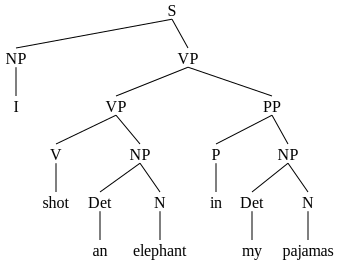

In [67]:
trees[0]

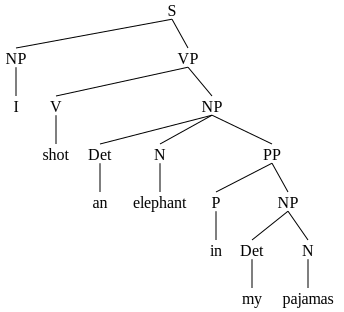

In [68]:
trees[1]

In [69]:

from nltk import CFG
from nltk.parse import RecursiveDescentParser


nltk.download('punkt')


# Create the parser
rd_parser = RecursiveDescentParser(groucho_grammar)

# Example sentence
sentence = "I shot an elephant in my pajamas"

# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Parse the sentence
for tree in rd_parser.parse(tokens):
    tree.pretty_print()  # or print(tree) for text output


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     S                                   
  ___|__________                          
 |              VP                       
 |    __________|______                   
 |   |                 NP                
 |   |     ____________|___               
 |   |    |     |          PP            
 |   |    |     |       ___|___           
 |   |    |     |      |       NP        
 |   |    |     |      |    ___|_____     
 NP  V   Det    N      P  Det        N   
 |   |    |     |      |   |         |    
 I  shot  an elephant  in  my     pajamas

     S                                       
  ___|______________                          
 |                  VP                       
 |         _________|__________               
 |        VP                   PP            
 |    ____|___              ___|___           
 |   |        NP           |       NP        
 |   |     ___|_____       |    ___|_____     
 NP  V   Det        N      P  Det        N   
 |   |    |         |      | 

RecursionError: maximum recursion depth exceeded while calling a Python object

Recursive Descent Parser and Chart Parser are two types of parsers used in parsing natural language or programming languages. They are fundamentally different in their approach and structure.

1. **Recursive Descent Parser**:
    - **Type**: It's a type of Top-Down Parser.
    - **Method**: It works by recursively expanding the start symbol and then trying to match the input string with the expansions. Each step involves choosing one of the production rules of a non-terminal and attempting to match it with the part of the input.
    - **Backtracking**: It might involve backtracking if a chosen production rule does not lead to a successful parse. This means it might have to revisit choices and try alternate production rules.
    - **Implementation**: Typically implemented using a set of mutually recursive procedures (or a function for each non-terminal in the grammar) in a programming language.
    - **Efficiency**: It can be inefficient for certain grammars, especially those with left recursion, as it might get stuck in infinite loops.
    - **Predictive Parsing**: A variant known as Predictive Parsing (or LL parsing) removes backtracking by requiring a lookahead to decide which production to use.

2. **Chart Parser**:
    - **Type**: It's a type of Bottom-Up Parser, often used in natural language processing.
    - **Method**: It constructs a 'chart' (a data structure) that records intermediate results of parsing. The chart is a form of dynamic programming.
    - **Dynamic Programming**: It avoids redundant parsing by storing intermediate results and reusing them, which makes it more efficient than simple recursive descent for many grammars.
    - **Handling Ambiguity**: Particularly suited for parsing ambiguous grammars common in natural languages, as it can keep track of multiple interpretations simultaneously.
    - **Earley Parser**: A well-known example of a chart parser is the Earley Parser, which is efficient for all context-free grammars and is not confined by issues like left recursion.

**Key Differences**:
- **Approach**: Recursive Descent is top-down (starting from the start symbol), while Chart Parsing is typically bottom-up (building from the input tokens).
- **Efficiency**: Chart parsers are generally more efficient and can handle a

wider range of grammars, including those with ambiguities and left recursion.
- **Complexity**: Recursive Descent parsers are simpler and easier to implement for simple grammars, but Chart parsers are more powerful for complex and ambiguous grammars.
- **Usage**: Recursive Descent parsers are more commonly used in compilers for programming languages, while Chart parsers are favored in natural language processing due to their ability to handle ambiguity.

Chart parsers may be more relevant for NLP tasks due to their efficiency with ambiguous grammars and natural language structures, while a recursive descent parser might be more suitable for introducing the basic concepts of parsing in programming languages. Both types offer valuable insights into how machines interpret and process languages, whether they are human or programming languages.